In [9]:
import pandas as pd
import os

In [10]:
files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/' + file) # All 12 months of data
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"


In [3]:
all_months_data.to_csv('all_data.csv', index=False)

In [269]:
all_data = pd.read_csv('all_data.csv')

In [270]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301"
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101"


### Get rid of corrupt data in Order Date, some cells simply say "Order Date"

In [271]:
all_data.shape

(186850, 6)

In [272]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [273]:
all_data.shape

(186495, 6)

### There are 545 rows with missing data, we need to remove them from all_data

In [7]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Months              object
dtype: object

In [275]:
df1 = all_data[all_data.isna().any(axis=1)]
df1.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,NaN,NaN,NaN,NaN,NaN,NaN,NaN
599,NaN,NaN,NaN,NaN,NaN,NaN,NaN
675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1027,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2631,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [276]:
all_data.dropna(how='all', inplace=True) # Only if all rows have missing data, conversely could write 'any'

In [277]:
all_data.shape

(185950, 7)

### Create a column named Months

In [278]:
all_data['Months'] = all_data['Order Date'].str[0:2]
all_data['Months'] = all_data['Months'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7


### Add a sales column

In [279]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) ## Pandas is amazing!
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [280]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95


**Just for testing purposes, singled out the AA Batteries**

In [38]:
newdf = all_data[all_data['Product'] == 'AA Batteries (4-pack)']
newdf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7
10,222920,AA Batteries (4-pack),1,3.84,07/30/19 04:42,"590 6th St, San Francisco, CA 94016",7
24,222934,AA Batteries (4-pack),2,3.84,07/03/19 23:51,"437 River St, Seattle, WA 98101",7
44,222954,AA Batteries (4-pack),2,3.84,07/14/19 18:11,"980 Chestnut St, Dallas, TX 75001",7


**Question 1: What was the best month for sales? How much was earned that month?**

In [281]:
all_data = all_data.rename(columns={'Months':'Month'})
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95


In [282]:
results = all_data.groupby('Month').sum()

In [283]:
results.head()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06


In [284]:
import matplotlib.pyplot as plt

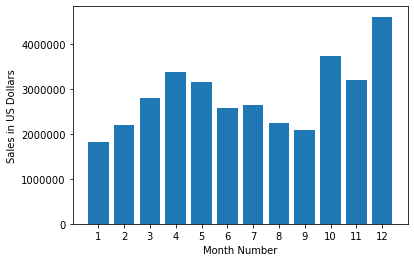

In [285]:
months = range(1,13)

plt.bar(months, results['Sales'])

plt.xticks(months)

plt.ylabel('Sales in US Dollars')
plt.xlabel('Month Number')

plt.show()

**Question 2: What US City had the highest number of sales?**

#### Data preprocessing, adding city column

In [286]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]


all_data['City'] = all_data['Purchase Address'].apply(lambda x: f'{get_city(x)} {get_state(x)}')

In [287]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta GA
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00,Seattle WA
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta GA
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta GA
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle WA


In [288]:
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


Text(0.5, 0, 'US Cities')

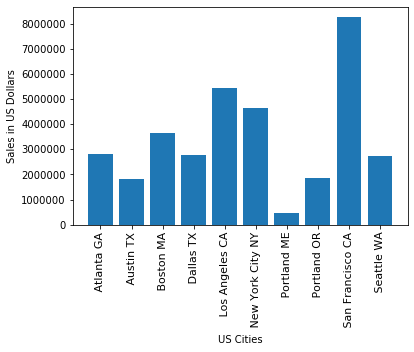

In [289]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=11)
plt.ylabel('Sales in US Dollars')
plt.xlabel('US Cities')

**Question 3: What time should we display advertisements to maximize likelihood of customers buying a product?**

In [116]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [125]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

In [127]:
hours = [hour for hour, df in all_data.groupby('Hour')]

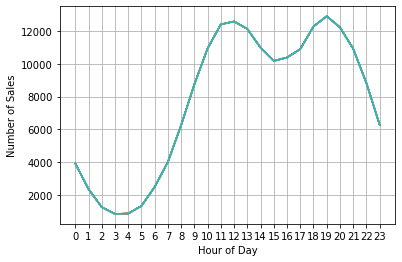

In [134]:
plt.plot(hours, all_data.groupby('Hour').count())

plt.xticks(hours)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Sales')
plt.grid()

plt.show()

*We see peak times at 11am and 7pm, ideal for marketing*

**Question 4: What products are most often sold together?**

In [156]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID','Grouped']].drop_duplicates()

df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Grouped
118,223028,"Vareebadd Phone,USB-C Charging Cable,Wired Hea..."
140,223048,"Vareebadd Phone,USB-C Charging Cable"
188,223095,"Apple Airpods Headphones,AA Batteries (4-pack)"
201,223106,"Wired Headphones,Vareebadd Phone"
213,223117,"Google Phone,USB-C Charging Cable"


In [159]:
from itertools import combinations
from collections import Counter
import pprint as p

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) # 2nd param is number of combinations

p.pprint(count)

#count.most_common(10)  # alternative

Counter({('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'): 87,
         ('iPhone', 'Lightning Charging Cable', 'Wired Headphones'): 62,
         ('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'): 47,
         ('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'): 35,
         ('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'): 33,
         ('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'): 27,
         ('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'): 24,
         ('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'): 16,
         ('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'): 5,
         ('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'): 5,
         ('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones'): 4,
         ('iPhone', 'Lightning Charging Cable', 'AA Batteries (4-pack)'): 3,
         ('iPhone', 'Apple A

**Question 5: What product sold the most?**

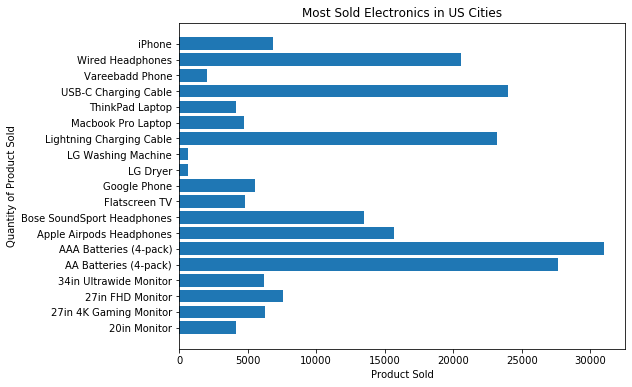

In [216]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.barh(products, quantity_ordered)

plt.rcParams['figure.figsize'] = (6,4)

#plt.xticks(products)
plt.ylabel('Quantity of Product Sold')
plt.xlabel('Product Sold')
plt.title('Most Sold Electronics in US Cities')

plt.show()

In [213]:
prices = all_data.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


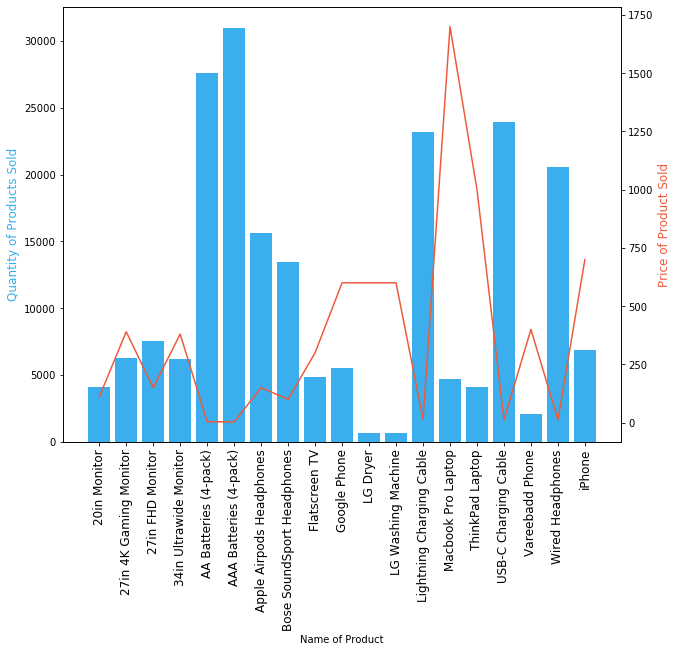

In [268]:
fig, ax1 = plt.subplots(figsize=(10,8))

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='#3bafed')
ax2.plot(products, prices, '#ed5a3b')


ax1.set_xlabel('Name of Product')
ax1.set_ylabel('Quantity of Products Sold', color='#3bafed', fontsize=12)
ax2.set_ylabel('Price of Product Sold', color='#ed5a3b', fontsize=12)
ax1.set_xticklabels(products, rotation=90, size=12)

plt.show()

*We see above as a products price goes down its quantity of product sold goes up*